导入必要的库

In [200]:
# from pyspark.mllib.regression import LabeledPoint
# from pyspark.mllib.regression import LinearRegressionModel
import pandas as pd
import numpy as np

读取csv文件数据，过滤时间段为（1981年-2010年），筛选某城市并分组聚合

In [201]:
o = open('NMC_Data.csv')
df = pd.read_csv(o)
# 时间过滤
df = df.query("时间段=='1981年-2010年'")
# 城市过滤
df = df.query(f"城市=='广州'")
# 分组聚合
df = df.groupby(['月份']).agg({'最大温度': np.mean, '最小温度': np.mean, '降水量': np.sum})
df = df.reset_index()
df.head()

,月份,最大温度,最小温度,降水量
0,1,19.0,10.8,44.3
1,2,20.7,13.5,67.9
2,3,22.8,15.9,94.9
3,4,26.5,20.0,183.5
4,5,30.5,23.3,285.6


数据清洗与转换

In [202]:
# 删除数据中带有缺失值的行
df = df.dropna()
# 获取最大温度,最小温度,降水量三列数据
max_temp = df.iloc[:, 1].to_numpy().reshape(-1, 1)
min_temp = df.iloc[:, 2].to_numpy().reshape(-1, 1)
rain_sum = df.iloc[:, 3].to_numpy().reshape(-1, 1)
print(max_temp)
print(min_temp)
print(rain_sum)

[[19. ]
 [20.7]
 [22.8]
 [26.5]
 [30.5]
 [32. ]
 [33.7]
 [33.5]
 [32.1]
 [29.7]
 [25.3]
 [21. ]]
[[10.8]
 [13.5]
 [15.9]
 [20. ]
 [23.3]
 [25.1]
 [26.3]
 [25.9]
 [24.7]
 [21.6]
 [16.5]
 [12. ]]
[[ 44.3]
 [ 67.9]
 [ 94.9]
 [183.5]
 [285.6]
 [315. ]
 [240. ]
 [230.8]
 [200.9]
 [ 70.5]
 [ 38.4]
 [ 29.4]]


构建线性回归模型

In [203]:
# 导入机器学习库中的线性回归类
from sklearn.linear_model import LinearRegression

# 新建一个线性回归模型，并把数据放进去对模型进行训练
linear_regressor = LinearRegression()
# 基于最高温度拟合线性回归模型
linear_regressor.fit(max_temp,rain_sum)
# 训练后的模型（最高温度）预测降雨量趋势
rain_sum_pred1 = linear_regressor.predict(max_temp)
# 基于最低温度拟合线性回归模型
linear_regressor.fit(min_temp,rain_sum)
# 训练后的模型（最低温度）预测降雨量趋势
rain_sum_pred2 = linear_regressor.predict(min_temp)

# coef_是系数，intercept_是截距
a = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
print("y=%.4f*x+%.4f" % (a,b))

#需分开对回归模型进行评分
# print("得分", linear_regressor.score(max_temp, rain_sum))
# print("得分", linear_regressor.score(min_temp, rain_sum))


y=15.6117*x+-156.4092


结果可视化

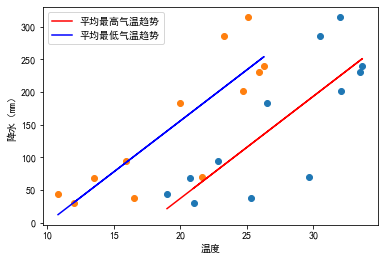

In [204]:
import matplotlib.pyplot as plt
# 设置全局字体样式
font = {
    'family': 'SimHei'
}
plt.rc('font', **font)
# 绘制散点图
plt.scatter(max_temp,rain_sum)
plt.scatter(min_temp,rain_sum)

# 绘制温度与降水量线性相关曲线
plt.plot(max_temp,rain_sum_pred1,color='red', label="平均最高气温趋势")
plt.plot(min_temp,rain_sum_pred2,color='blue', label="平均最低气温趋势")
# 在左侧显示图例
plt.legend(loc="upper left")
# 为两条坐标轴设置名称
plt.xlabel("温度")
plt.ylabel("降水（mm）")
plt.show()
## 得出结论，随着平均气温的升高，降水量也将随之上升